In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import tkinter as tk
from scipy import stats
import plotly.plotly as py            #using package to draw pie chart which was not discussed in class
import plotly.graph_objs as go        #using package to add style to the pie chart which was not discussed in class
from statsmodels.formula.api import ols

import FPFunctions_AyanSarkar as func     #Calling the script which has reusable functions
 
import os
os.chdir(os.getcwd())

#Reading the input hiles about Hoise Sales in Denver Area
HouseSalesData = pd.read_excel('HouseSales.xlsx')
HouseSalesData.head()

,Farms,Meadows,SquareFeet,BedRooms,AttachedGarage,CeilingHeight,Profit
0,1,0,4500,4,1,9,95090.623453
1,1,0,2700,5,1,10,111607.329395
2,1,0,2100,2,1,8,73218.361139
3,1,0,4600,3,1,9,88977.929830
4,1,0,3800,4,0,10,94023.728596


### Data Exploration

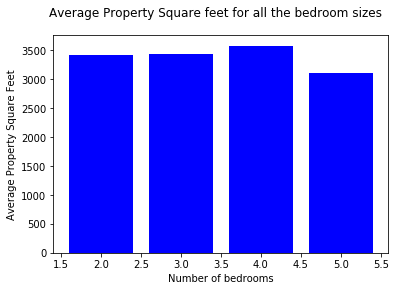

In [2]:
# Average Square feet for all the bedroom sizes

func.Bargraph('Average Property Square feet for all the bedroom sizes',HouseSalesData['BedRooms'].unique(),
         HouseSalesData['SquareFeet'].groupby(HouseSalesData['BedRooms']).mean(),
         'Average Property Square Feet',
         'Number of bedrooms','Option0.png','blue')

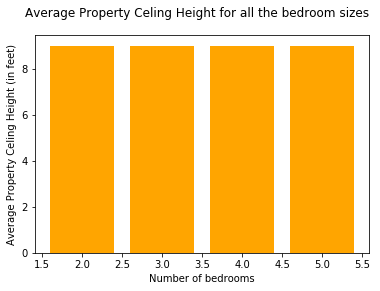

In [3]:
# Average Celing Height for all the bedroom sizes

func.Bargraph('Average Property Celing Height for all the bedroom sizes',HouseSalesData['BedRooms'].unique(),
         HouseSalesData['CeilingHeight'].groupby(HouseSalesData['BedRooms']).mean(),
         'Average Property Celing Height (in feet)',
         'Number of bedrooms','Option1.png','orange')

In [4]:
#Number of Farms, Meadows and Attached Garages for all the bedroom sizes

func.Piechart('Number of Farms, Meadows and Attached Garages for all Bed room sizes.',
         ['2 Bed rooms','3 Bed rooms','4 Bed rooms','5 Bed rooms'],
         np.array(HouseSalesData[['Farms']].groupby(HouseSalesData['BedRooms']).sum()),
         'Farms',
         np.array(HouseSalesData[['Meadows']].groupby(HouseSalesData['BedRooms']).sum()),
         'Meadows',
         np.array(HouseSalesData[['AttachedGarage']].groupby(HouseSalesData['BedRooms']).sum()),
         'Attached Garage'
        )

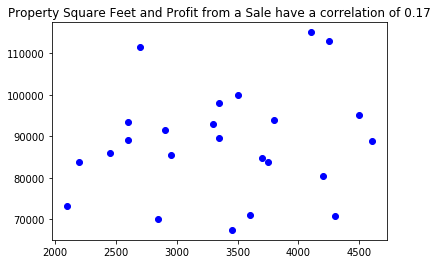

In [5]:
# Relation between Property Square Feet and the profit of a sale

func.ScatterPlot('Property Square Feet and Profit from a Sale have a correlation of ',
                 HouseSalesData['SquareFeet'],
                 HouseSalesData['Profit'],
                 'Option3.png','blue')

This is a test of equal variances with Ho: The variances in Profit of properties having bedroom numbers of 4 and 5 are equal
The t test statistic is 0.565 and the p-value is 0.4524
Conclusion: Fail to Reject Ho: We can't reject that the variances in Profit of properties having bedroom numbers of 4 and 5are the same


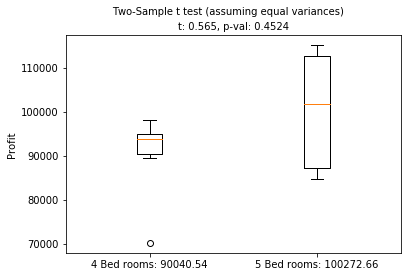

In [6]:
#Compare Profits for Sales of properties having bedroom numbers of 4 and 5

func.tTestEqlVar(HouseSalesData[HouseSalesData['BedRooms']==4].Profit,
            HouseSalesData[HouseSalesData['BedRooms']==5].Profit,
            "This is a test of equal variances with Ho: The variances in Profit of properties having bedroom numbers of 4 and 5 are equal",
            "Conclusion: Reject Ho: The variances in Profit of properties having bedroom sizes of 4 and 5 are not equal",
            "Conclusion: Fail to Reject Ho: We can't reject that the variances in "+ 
              "Profit of properties having bedroom numbers of 4 and 5are the same",
            "Profit",
            'Option4.png'
            )

This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 3.561 and the p-value is 0.0326
Conclusion: Reject Ho: At least one group mean is different


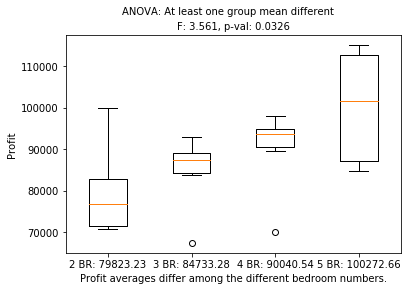

In [2]:
#Compare Profits for Sales of properties for evry number of bedroom options

func.AnovaTest(HouseSalesData[HouseSalesData['BedRooms']==2].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==3].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==4].Profit,
               HouseSalesData[HouseSalesData['BedRooms']==5].Profit,
               "This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different",
               'Profit averages differ among the different bedroom numbers.',
               'Profit',
               'Option5.png')



In [4]:
#Regression anlysis for the Profit in House sales

################ Profit predicted by No. of Farms, No. of Meadows, No. of Attached Garages,##
################  Square feet of the Property & the Ceiling height ##########################


model = ols("Profit ~ Farms + Meadows + SquareFeet + BedRooms + AttachedGarage + CeilingHeight",data=HouseSalesData).fit()
print(model.summary()) # Print the results



                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     91.78
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           5.29e-12
Time:                        19:02:46   Log-Likelihood:                -219.04
No. Observations:                  24   AIC:                             452.1
Df Residuals:                      17   BIC:                             460.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.427e+04   6479.391     -2.

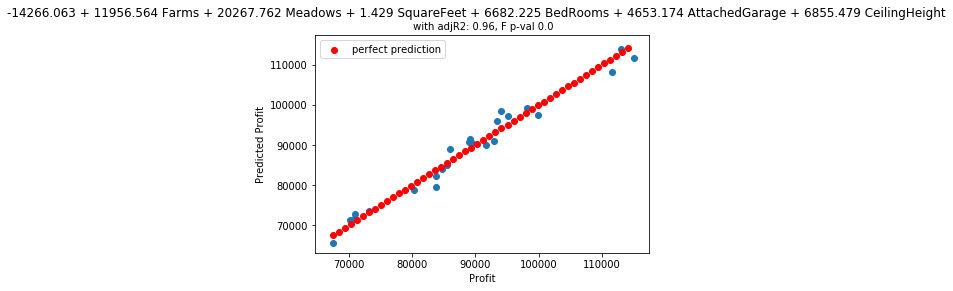

(0.96,
 0.0,
 '-14266.063 + 11956.564 Farms + 20267.762 Meadows + 1.429 SquareFeet + 6682.225 BedRooms + 4653.174 AttachedGarage + 6855.479 CeilingHeight')

In [5]:
#Regression Plots

ydata=HouseSalesData['Profit']

#Regression - Prediction plot
func.my_multreg(model,ydata,'Profit','Predicted Profit',0,150000,True,False)

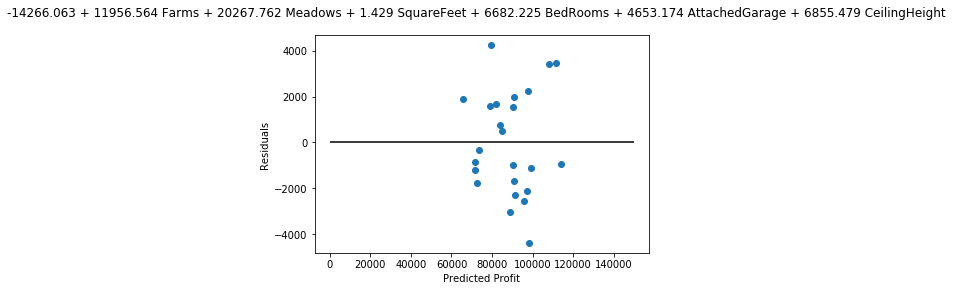

(0.96,
 0.0,
 '-14266.063 + 11956.564 Farms + 20267.762 Meadows + 1.429 SquareFeet + 6682.225 BedRooms + 4653.174 AttachedGarage + 6855.479 CeilingHeight')

In [6]:
#Regression - Residual plot
func.my_multreg(model,ydata,'Profit','Predicted Profit',0,150000,False,True)